### Importing libraries and loading the dataframe

In [32]:
import numpy as np
import pandas as pd
df = pd.read_csv("PE_ratio.csv")

### removing null values and making PE ratio column numeric

In [33]:
df = df.dropna()
df =df[pd.to_numeric(df['PE_RATIO'], errors='coerce').notnull()]
df.dtypes

Ticker             object
INDUSTRY_SECTOR    object
PE_RATIO           object
dtype: object

In [34]:
def coerce_df_columns_to_numeric(df, column_list):
    df[column_list]= df[column_list].apply(pd.to_numeric, errors ='coerce')
coerce_df_columns_to_numeric(df,['PE_RATIO'])
df.dtypes

Ticker              object
INDUSTRY_SECTOR     object
PE_RATIO           float64
dtype: object

In [35]:
df.describe()

,PE_RATIO
count,492.000000
mean,33.614505
std,133.420755
min,5.213177
25%,15.700018
50%,20.101022
75%,25.767417
max,2520.285578


### Removing outliers

In [36]:
is_300 = df['PE_RATIO'] < 300
df = df[is_300]

### Grouping data by sector 

In [37]:
df = df.groupby(['INDUSTRY_SECTOR','Ticker'])['PE_RATIO'].sum().reset_index()

In [38]:
for industry in df['INDUSTRY_SECTOR'].unique():
    print(industry)

Basic Materials
Communications
Consumer, Cyclical
Consumer, Non-cyclical
Energy
Financial
Industrial
Technology
Utilities


In [39]:
for industry in df['INDUSTRY_SECTOR'].unique():
    BM = pd.DataFrame(df[df.INDUSTRY_SECTOR== 'Basic Materials'])
    c = pd.DataFrame(df[df.INDUSTRY_SECTOR== 'Communications'])
    cc = pd.DataFrame(df[df.INDUSTRY_SECTOR== 'Consumer, Cyclical'])
    cn = pd.DataFrame(df[df.INDUSTRY_SECTOR== 'Consumer, Non-cyclical'])
    e = pd.DataFrame(df[df.INDUSTRY_SECTOR== 'Energy'])
    f = pd.DataFrame(df[df.INDUSTRY_SECTOR== 'Financial'])
    i = pd.DataFrame(df[df.INDUSTRY_SECTOR== 'Industrial'])
    t = pd.DataFrame(df[df.INDUSTRY_SECTOR== 'Technology'])
    u = pd.DataFrame(df[df.INDUSTRY_SECTOR== 'Utilities'])

### Calculating Quintile range (qr) and quintile (q)

In [40]:
BM['qr']= pd.qcut(BM['PE_RATIO'],q=5)
BM['q']= pd.qcut(BM['PE_RATIO'],q=[0,.2,.4,.6,.8,1], labels=False)
c['qr']= pd.qcut(c['PE_RATIO'],q=5)
c['q']= pd.qcut(c['PE_RATIO'],q=[0,.2,.4,.6,.8,1], labels=False)
cc['qr']= pd.qcut(cc['PE_RATIO'],q=5)
cc['q']= pd.qcut(cc['PE_RATIO'],q=[0,.2,.4,.6,.8,1], labels=False)
cn['qr']= pd.qcut(cn['PE_RATIO'],q=5)
cn['q']= pd.qcut(cn['PE_RATIO'],q=[0,.2,.4,.6,.8,1], labels=False)
e['qr']= pd.qcut(e['PE_RATIO'],q=5)
e['q']= pd.qcut(e['PE_RATIO'],q=[0,.2,.4,.6,.8,1], labels=False)
f['qr']= pd.qcut(f['PE_RATIO'],q=5)
f['q']= pd.qcut(f['PE_RATIO'],q=[0,.2,.4,.6,.8,1], labels=False)
i['qr']= pd.qcut(i['PE_RATIO'],q=5)
i['q']= pd.qcut(i['PE_RATIO'],q=[0,.2,.4,.6,.8,1], labels=False)
t['qr']= pd.qcut(t['PE_RATIO'],q=5)
t['q']= pd.qcut(t['PE_RATIO'],q=[0,.2,.4,.6,.8,1], labels=False)
u['qr']= pd.qcut(u['PE_RATIO'],q=5)
u['q']= pd.qcut(u['PE_RATIO'],q=[0,.2,.4,.6,.8,1], labels=False)

### New database with quintile range and values

In [41]:
df_quintile =pd.concat([BM,c,cc,cn,e,f,i,t,u])
df_quintile.shape

(489, 5)

In [42]:
df_quintile['q'].value_counts()

0    101
4    100
3     96
2     96
1     96
Name: q, dtype: int64

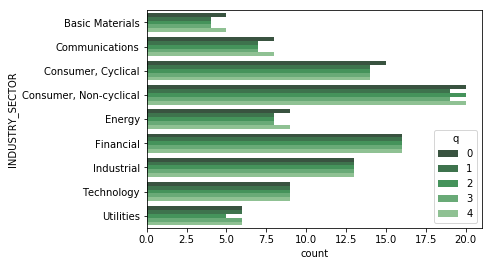

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(y="INDUSTRY_SECTOR", hue="q", data=df_quintile, palette="Greens_d")
plt.show()

In [44]:
df_quintile.head()

,INDUSTRY_SECTOR,Ticker,PE_RATIO,qr,q
0,Basic Materials,AA UN Equity,16.912083,"(15.408, 19.072]",1
1,Basic Materials,APD UN Equity,25.753293,"(25.575, 94.236]",4
2,Basic Materials,ARG UN Equity,23.713115,"(23.407, 25.575]",3
3,Basic Materials,ATI UN Equity,94.236034,"(25.575, 94.236]",4
4,Basic Materials,CF UN Equity,15.323313,"(8.788, 15.408]",0
